<a href="https://colab.research.google.com/github/VysePresident/Alzheimers_Disease_MRI_Classification/blob/main/Alzheimer_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

import cv2
import os

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,Input

In [ ]:
!unzip archive.zip

In [ ]:
base_dir = "/content/Alzheimer_s Dataset"

In [ ]:
train = ImageDataGenerator(rescale=1./255)
test =  ImageDataGenerator(rescale=1./255)
val =  ImageDataGenerator(rescale=1./255)

In [ ]:
train="/content/Alzheimer_s Dataset/train"

train_data = tf.keras.preprocessing.image_dataset_from_directory(
    train,
    validation_split=0.2,
    image_size=(224,224),
    batch_size=32,
    subset='training',
    seed=1000)

Found 5121 files belonging to 4 classes.
Using 4097 files for training.


In [ ]:
val="/content/Alzheimer_s Dataset/train"

val_data = tf.keras.preprocessing.image_dataset_from_directory(
    val,
    validation_split=0.2,
    image_size=(224,224),
    batch_size=32,
    subset='validation',
    seed=1000
    )

Found 5121 files belonging to 4 classes.
Using 1024 files for validation.


In [ ]:
test="/content/Alzheimer_s Dataset/test"

test_data=tf.keras.preprocessing.image_dataset_from_directory(
    test,
    image_size=(224,224),
    batch_size=32,
    seed=1000
    )


Found 1279 files belonging to 4 classes.


In [ ]:
class_names = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

In [ ]:
train_data.class_names = class_names
val_data.class_names = class_names

In [ ]:
print(val_data)

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


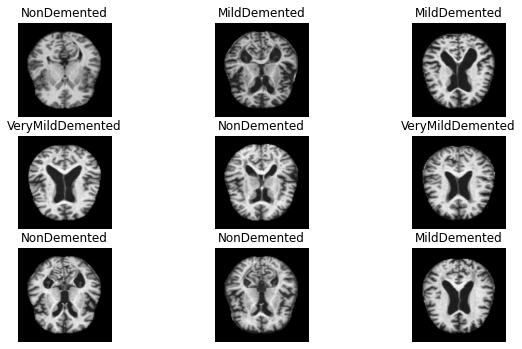

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
    for i in range(9):
        ax = plt.subplot(5, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(train_data.class_names[labels[i]])
        plt.axis("off")
plt.savefig("sample.png")

In [ ]:
model=Sequential()

model.add(Conv2D(16,(3,3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(256,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32,activation='relu'))
model.add(Dense(4,activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(1e-4), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(train_data, validation_data=val_data, epochs=50)

Epoch 1/50
129/129 [==============================] - 18s 53ms/step - loss: 2.3630 - accuracy: 0.4345 - val_loss: 1.1946 - val_accuracy: 0.5088
Epoch 2/50
129/129 [==============================] - 7s 51ms/step - loss: 1.1974 - accuracy: 0.4433 - val_loss: 1.1340 - val_accuracy: 0.4912
Epoch 3/50
129/129 [==============================] - 7s 50ms/step - loss: 1.1681 - accuracy: 0.4494 - val_loss: 1.1330 - val_accuracy: 0.5088
Epoch 4/50
129/129 [==============================] - 7s 50ms/step - loss: 1.1329 - accuracy: 0.4620 - val_loss: 1.1596 - val_accuracy: 0.5215
Epoch 5/50
129/129 [==============================] - 7s 50ms/step - loss: 1.1111 - accuracy: 0.4679 - val_loss: 1.1199 - val_accuracy: 0.5068
Epoch 6/50
129/129 [==============================] - 7s 51ms/step - loss: 1.0899 - accuracy: 0.4633 - val_loss: 1.0723 - val_accuracy: 0.5078
Epoch 7/50
129/129 [==============================] - 7s 50ms/step - loss: 1.0609 - accuracy: 0.4833 - val_loss: 1.0362 - val_accuracy: 0.507

In [ ]:
model.evaluate(test_data)

40/40 [==============================] - 2s 38ms/step - loss: 1.3311 - accuracy: 0.6380


[1.3310887813568115, 0.6379984617233276]

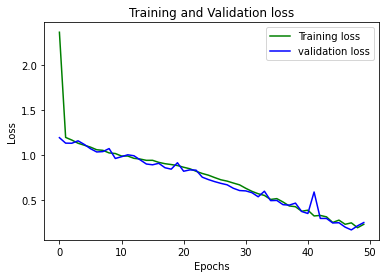

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
plt.plot(loss_train, 'g', label='Training loss')
plt.plot(loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("train_vs_val_loss.png")
plt.show()

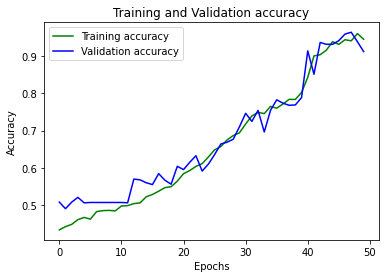

In [ ]:
accuracy_train = history.history['accuracy']
accuracy_val = history.history['val_accuracy']
plt.plot(accuracy_train, 'g', label='Training accuracy')
plt.plot(accuracy_val, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("train_vs_val_acc.png")
plt.show()

In [ ]:
class_names={0:"MildDemented", 1:"ModerateDemented", 2:"NonDemented", 3:"VeryMildDemented"}

1/1 [==============================] - 0s 19ms/step


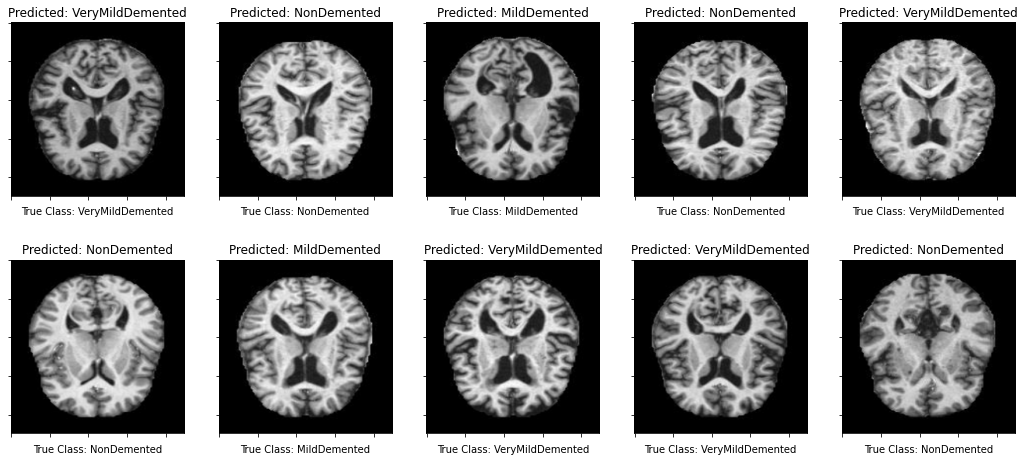

In [ ]:
plt.figure(figsize=(18,8))
for images, labels in val_data.take(1):
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.imshow(images[i]/255)
        frame1 = plt.gca()
        frame1.axes.xaxis.set_ticklabels([])
        frame1.axes.yaxis.set_ticklabels([])
        x = image.img_to_array(images[i])
        x = np.expand_dims(x, axis=0)
        p=np.argmax(model.predict(x))    
        plt.title("Predicted: {}".format(class_names[p]))
        plt.xlabel("True Class: {}".format(val_data.class_names[labels[i]]))

In [ ]:
%%shell
jupyter nbconvert --to html /content/Alzheimer's_CNN.ipynb

/bin/bash: -c: line 0: unexpected EOF while looking for matching `''
/bin/bash: -c: line 1: syntax error: unexpected end of file


CalledProcessError: ignored